In [1]:
import pandas as pd
import numpy as np
import missingno as mno
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('who_suicide_statistics.csv')

In [4]:
data

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
...,...,...,...,...,...,...
43771,Zimbabwe,1990,male,25-34 years,150.0,NaN
43772,Zimbabwe,1990,male,35-54 years,132.0,NaN
43773,Zimbabwe,1990,male,5-14 years,6.0,NaN
43774,Zimbabwe,1990,male,55-74 years,74.0,NaN


In [5]:
data.shape

(43776, 6)

In [6]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population'], dtype='object')

In [7]:
data.describe

<bound method NDFrame.describe of         country  year     sex          age  suicides_no  population
0       Albania  1985  female  15-24 years          NaN    277900.0
1       Albania  1985  female  25-34 years          NaN    246800.0
2       Albania  1985  female  35-54 years          NaN    267500.0
3       Albania  1985  female   5-14 years          NaN    298300.0
4       Albania  1985  female  55-74 years          NaN    138700.0
...         ...   ...     ...          ...          ...         ...
43771  Zimbabwe  1990    male  25-34 years        150.0         NaN
43772  Zimbabwe  1990    male  35-54 years        132.0         NaN
43773  Zimbabwe  1990    male   5-14 years          6.0         NaN
43774  Zimbabwe  1990    male  55-74 years         74.0         NaN
43775  Zimbabwe  1990    male    75+ years         13.0         NaN

[43776 rows x 6 columns]>

In [8]:
data.dtypes

country         object
year             int64
sex             object
age             object
suicides_no    float64
population     float64
dtype: object

Lets start with the Data wrangling and preprocessing. Preprocessing will allow our machine learning model to deduce better results. 
We will start by checking for null values.

In [9]:
data.isnull().values.any()

True

In [10]:
data.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

We have null values in two columns: suicides_no and population. We will replace the missing values with the mean of the columns.

In [11]:
data['suicides_no'].mean()

193.3153901734104

In [12]:
data['suicides_no'] = data['suicides_no'].fillna((data['suicides_no'].mean()))

In [13]:
data['population'] = data['population'].fillna((data['population'].mean()))

Lets look again if we are left with any null/missing values in our dataset.

In [14]:
data.isnull().sum()

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
dtype: int64

In [15]:
data

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,193.31539,2.779000e+05
1,Albania,1985,female,25-34 years,193.31539,2.468000e+05
2,Albania,1985,female,35-54 years,193.31539,2.675000e+05
3,Albania,1985,female,5-14 years,193.31539,2.983000e+05
4,Albania,1985,female,55-74 years,193.31539,1.387000e+05
...,...,...,...,...,...,...
43771,Zimbabwe,1990,male,25-34 years,150.00000,1.664091e+06
43772,Zimbabwe,1990,male,35-54 years,132.00000,1.664091e+06
43773,Zimbabwe,1990,male,5-14 years,6.00000,1.664091e+06
43774,Zimbabwe,1990,male,55-74 years,74.00000,1.664091e+06


<H2>Data Visualization</H2>
Lets have a look at the data to visually see the relationship between different factors and suicide rate.

In [16]:
data['country'].nunique()

141

In [17]:
#Lets find the correlation of country's population with suicide rate
corr = data['suicides_no'].corr(data['population'])
corr

0.5991436043525431

Hence there lies a strong correlation between increased population levels with elevated suicide rates.

In [18]:
#Lets look for top 20 countries with highest suicide rates
data[['country', 'suicides_no']].groupby(['country']).agg('sum').sort_values(by = 'suicides_no', ascending = False).head(20)

,suicides_no
country,
Russian Federation,1.505632e+06
United States of America,1.203721e+06
Japan,9.376140e+05
France,3.955000e+05
Ukraine,3.674898e+05
Germany,2.912620e+05
Republic of Korea,2.617300e+05
Brazil,2.508240e+05
Poland,1.864807e+05


In [19]:
#Lets look for the year in which max suicides were reported
data[['suicides_no', 'year']].groupby(['year']).agg('sum').sort_values(by = 'suicides_no', ascending = False).head(10)

,suicides_no
year,
2003,265068.569364
2002,265040.569364
1999,259984.000000
2000,259905.000000
1998,255598.784682
2001,255071.000000
1996,252672.784682
2004,252208.354046
1995,250554.569364


Lets look for the relationship between gender and suicide.

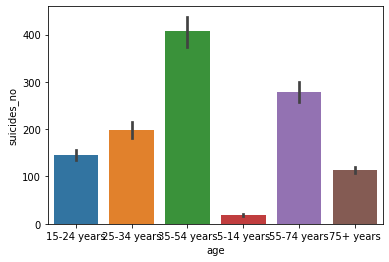

In [20]:
sns.barplot(x=data['age'],y=data['suicides_no'],data=data)

It is evident that maximum suicide rates are reported between the age groups 25-54 years.

<H2>Feature Selection</H2>
It is important to select useful features and feed them to model. Redundant features will not contribute much to the accuracy.
We dropped the country column because it was not contributing any value.

In [21]:
data = data.drop(['country'],axis=1)

Next we will convert the values in columns with categorical features to integer values for regression model. Label encoding is being used for this purpose.

In [23]:
from sklearn import preprocessing
labelencoding = preprocessing.LabelEncoder()

data['sex'] = labelencoding.fit_transform(data['sex'])
data['age'] = labelencoding.fit_transform(data['age'])

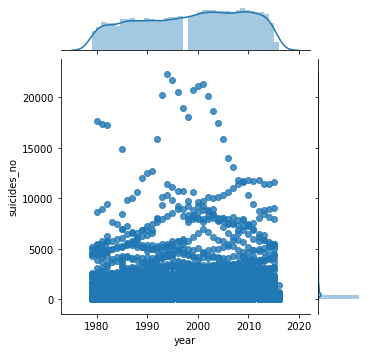

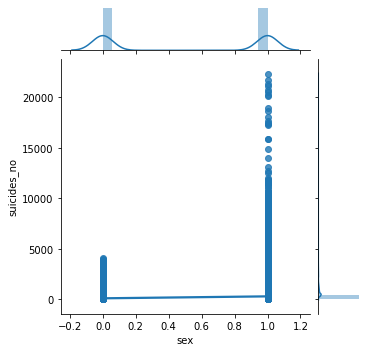

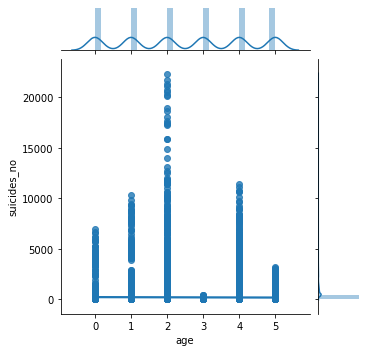

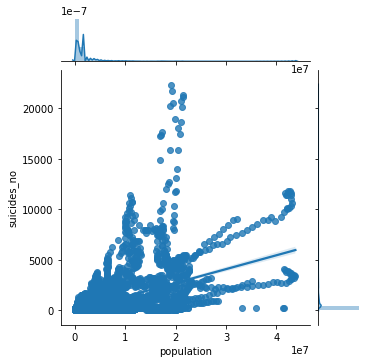

In [24]:
train_data = data
cols = train_data.columns.values
for c in cols:
    if c != "suicides_no":
        sns.jointplot(x=c, y="suicides_no", data=train_data, kind = 'reg', height = 5)
plt.show()

In [25]:
data['suicides_no'] = data['suicides_no'].astype(int)
data['population'] = data['population'].astype(int)

In [26]:
data

,year,sex,age,suicides_no,population
0,1985,0,0,193,277900
1,1985,0,1,193,246800
2,1985,0,2,193,267500
3,1985,0,3,193,298300
4,1985,0,4,193,138700
...,...,...,...,...,...
43771,1990,1,1,150,1664091
43772,1990,1,2,132,1664091
43773,1990,1,3,6,1664091
43774,1990,1,4,74,1664091


<H2>Model Training</H2>
<p>
Model training includes the following steps.
<br>1. Split the data into train and test sets.
<br>2. Train the model.
    </p>

In [27]:
from sklearn.model_selection import train_test_split

y = train_data['suicides_no']
x = train_data.drop(columns=['suicides_no'] , axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print("x-train dimensions:", x_train.shape)
print("y-train dimensions:", y_train.shape)
print("x-test dimensions:", x_test.shape)
print("y-test dimensions:", y_test.shape)

x-train dimensions: (35020, 4)
y-train dimensions: (35020,)
x-test dimensions: (8756, 4)
y-test dimensions: (8756,)


In [28]:
models=[]
scores=[]
errors=[]

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

linreg=LinearRegression()
linreg.fit(x_train,y_train)

p1=linreg.predict(x_test)
s1=r2_score(y_test,p1)
e1=mean_squared_error(y_test,p1)

models.append('linear regression')
scores.append(s1)
errors.append(e1)

In [30]:
from sklearn.ensemble import RandomForestRegressor

randforest=RandomForestRegressor()

randforest.fit(x_train,y_train)

p2=randforest.predict(x_test)
s2=r2_score(y_test,p2)
e2=mean_squared_error(y_test,p2)

models.append('randomforest')
scores.append(s2)
errors.append(e2)

In [31]:
from sklearn.svm import SVR

svm=SVR()

svm.fit(x_train,y_train)

p3=svm.predict(x_test)
s3=r2_score(y_test,p3)
e3=mean_squared_error(y_test,p3)

models.append('svr')
scores.append(s3)
errors.append(e3)

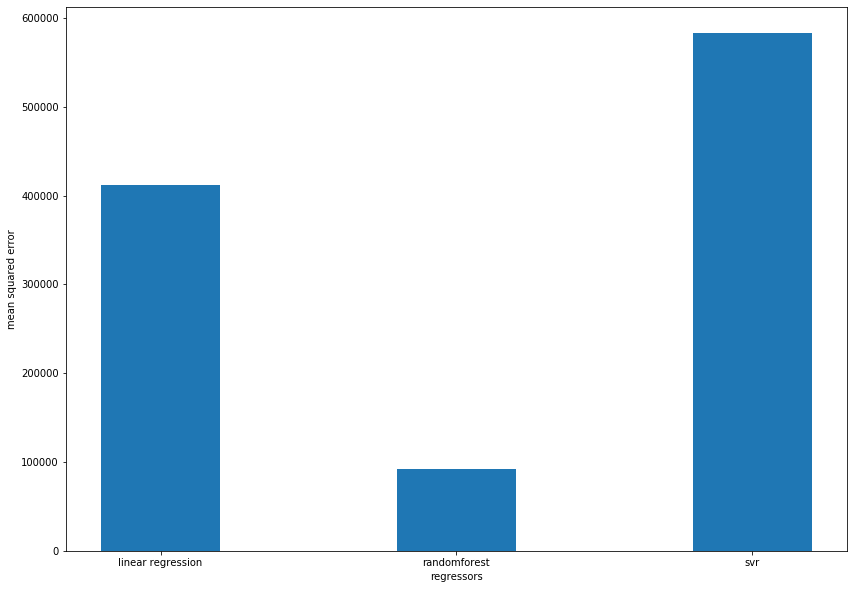

In [32]:
plt.figure(figsize=(14,10))
plt.bar(models,errors,width=0.4)
plt.xlabel('regressors')
plt.ylabel('mean squared error')
plt.show()

Mean square error is minimum while using the random forest regressor but highest with the support vector regressor model.

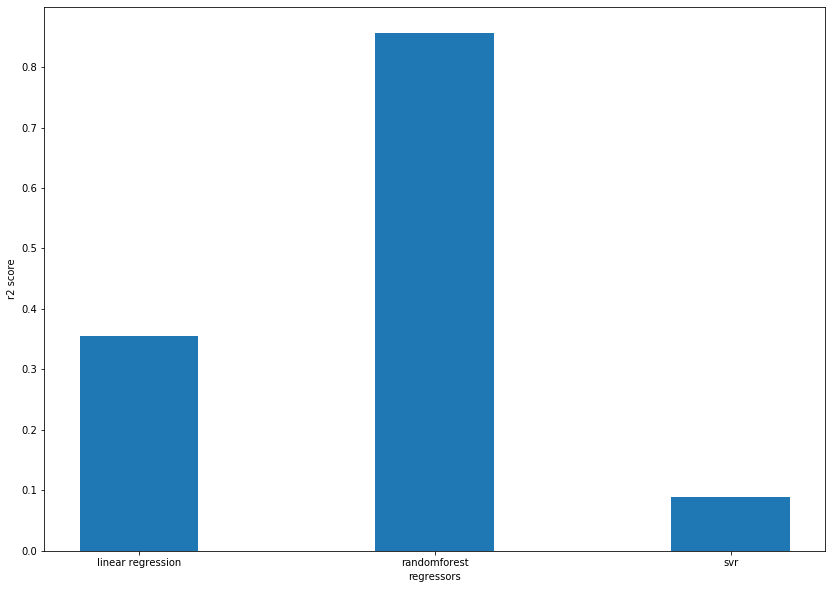

In [33]:
plt.figure(figsize=(14,10))
plt.bar(models,scores,width=0.4)
plt.xlabel('regressors')
plt.ylabel('r2 score')
plt.show()

We have a r square score value of 0.8 with the random forest regressor which is very good. It demonstrates strong correlation and variability. However r^2 score has least value while using Support vector regressor.